## This story exercise is written for a non-technical audience.

# Out of the most recorded species to bite a human, which breed is the most likely to transmit rabies?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bites = pd.read_csv('Health_AnimalBites.csv')
bites.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


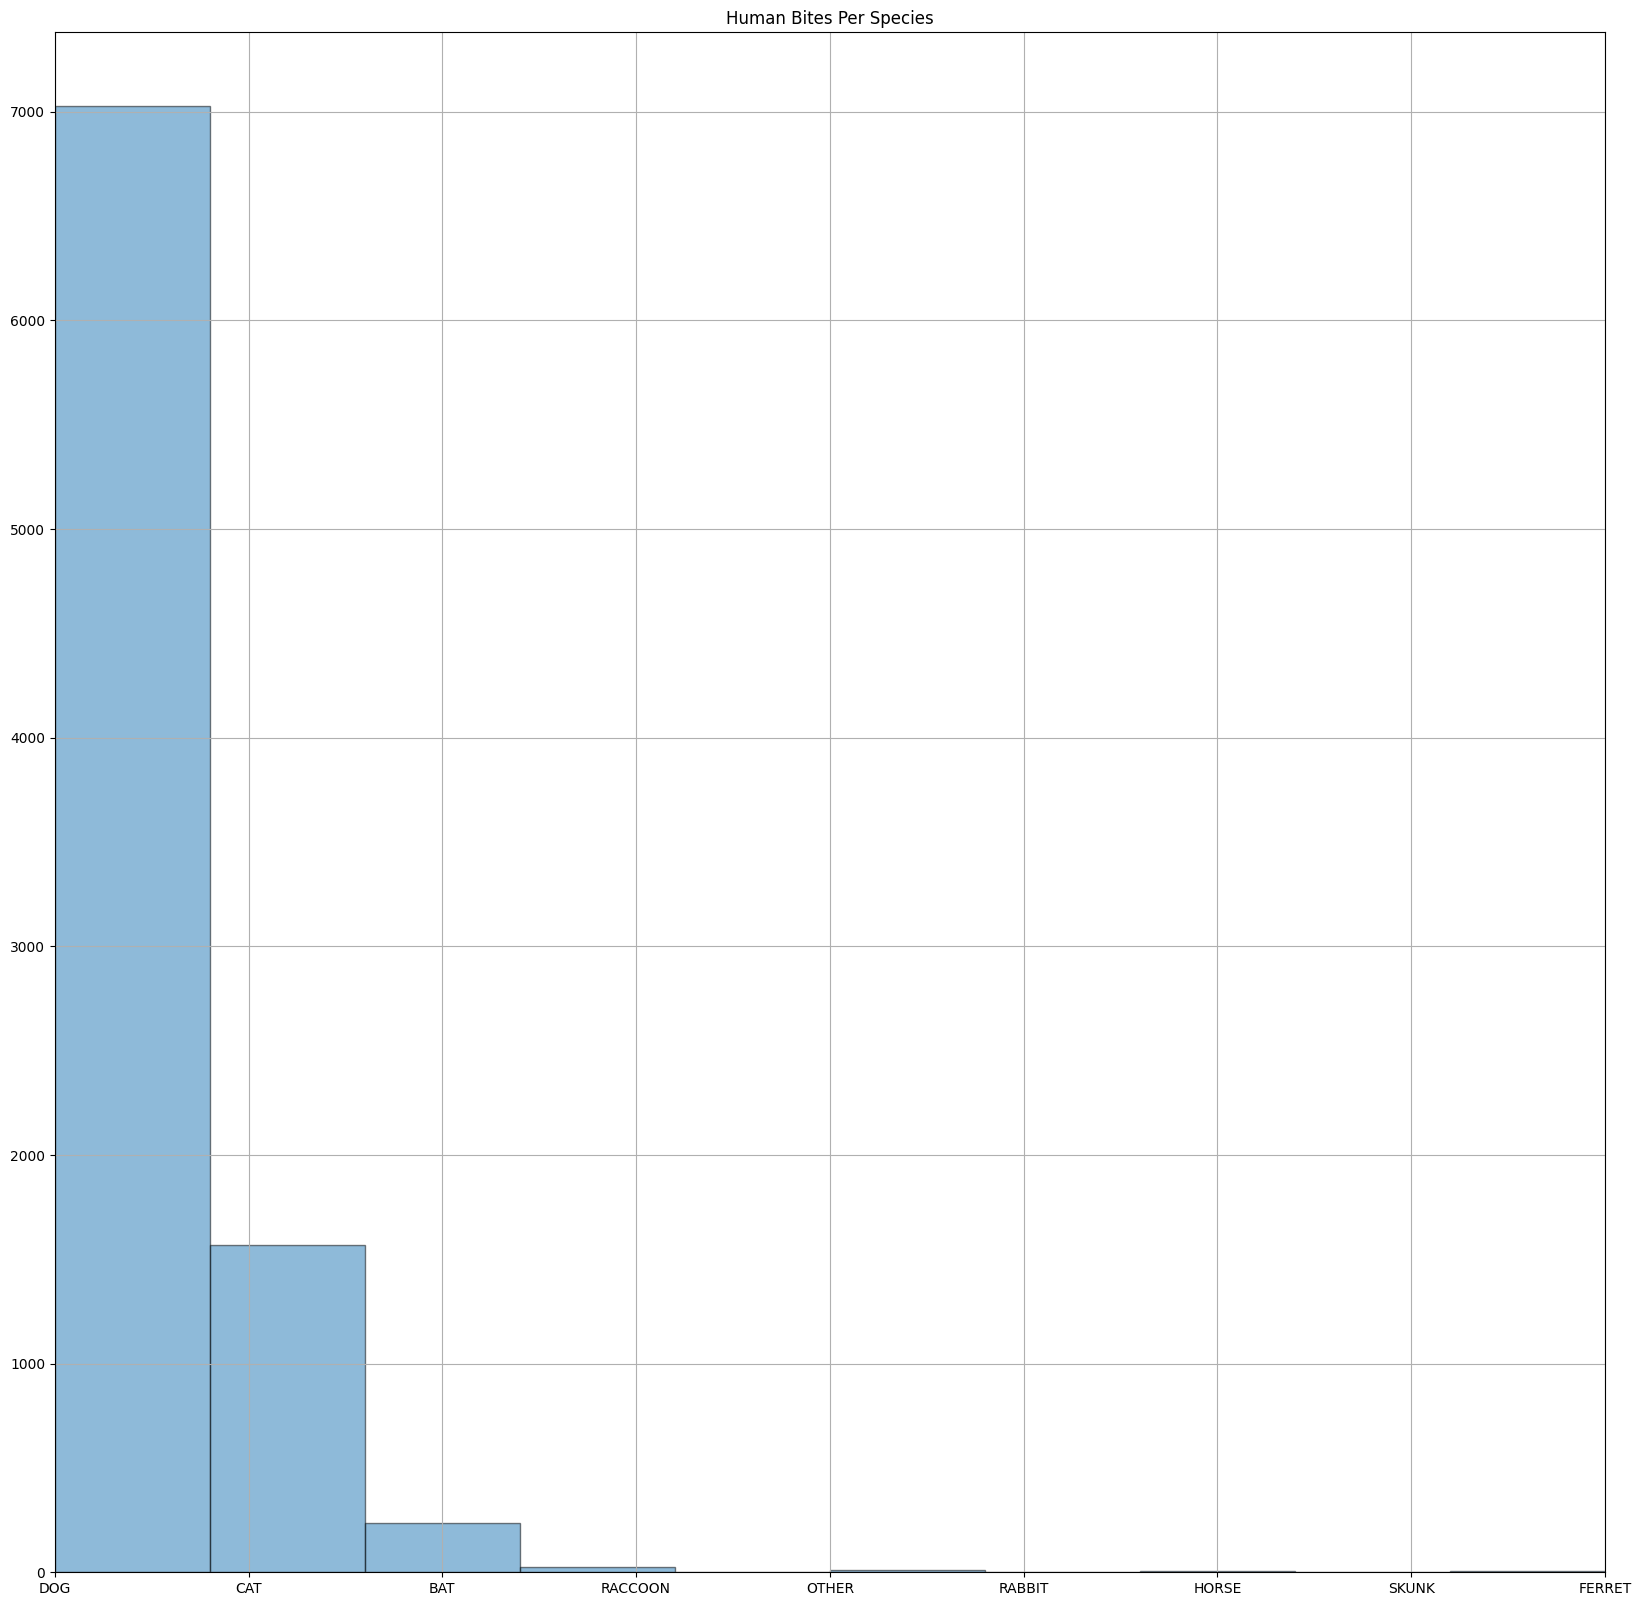

In [3]:
bites['SpeciesIDDesc'].hist(alpha = 0.5, figsize=(20,20), edgecolor = "black")
plt.title('Human Bites Per Species')
plt.margins(x=0)
plt.show()

In [4]:
print('Sums of human bites per species')
print(bites["SpeciesIDDesc"].value_counts())

Sums of human bites per species
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64


### The top three most recorded species to bite a human are dogs, cats, and bats.  Recorded dog bites almost quadruple the sum of cat and bat bites.

In [5]:
dog_breeds = bites[bites["SpeciesIDDesc"] == 'DOG']
dog_breeds['BreedIDDesc'].value_counts()

PIT BULL           1101
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

### Within the observations of dog bites, the top three breeds with the most records include Pit Bulls, German Shepards, and Labrador Retreivers. Pit Bull attacks nearly double those of German Shepards and Labrador Retreivers combined.

In [6]:
positive_results = dog_breeds[dog_breeds['ResultsIDDesc'] == 'POSITIVE']
positive_results

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1502,2017-04-29 00:00:00,DOG,GREAT PYRENEESE,FEMALE,WHITE,NaN,NaN,40210,NaN,NaN,NaN,NaN,2017-05-01 00:00:00,NaN,POSITIVE


In [7]:
gp = dog_breeds[dog_breeds['BreedIDDesc']=='GREAT PYRENEESE']
gp_labels_nonpos = gp[gp['ResultsIDDesc']!= 'POSITIVE']
gp_labels_missing = gp_labels_nonpos[gp_labels_nonpos['ResultsIDDesc']!= 'NEGATIVE']
print('There are', gp.shape[0], 'records of Great Pyreneese bites, and', gp_labels_missing.shape[0], 'records with rabies data missing.')

There are 10 records of Great Pyreneese bites, and 9 records with rabies data missing.


### The only breed of dog (Great Pyreneese) recorded to transmit rabies to a human did not belong to one of the top three, and there was exactly 1 record of it.  The remaining bite records from the same breed has missing rabies data.  It is unclear if the rabies record is an outlier from the data or if this breed dog is more likely to transmit rabies than others.

### Now let's investigate the volume of missing rabies data over all dog breeds.

In [8]:
dog_breeds_no_pos = dog_breeds[dog_breeds['ResultsIDDesc']!='POSITIVE']
dog_breeds_no_pos_or_neg = dog_breeds_no_pos[dog_breeds_no_pos['ResultsIDDesc']!='NEGATIVE']
print(dog_breeds_no_pos_or_neg['ResultsIDDesc'].isnull().sum(), "dog bite records have missing rabies contraction data.")
print(dog_breeds_no_pos_or_neg[dog_breeds_no_pos_or_neg['ResultsIDDesc']=='UNKNOWN'].shape[0], "dog bite records have \"UNKNOWN\" rabies contraction data.")
print(dog_breeds_no_pos_or_neg.shape[0], "dog bite records may or may not have transmitted rabies to the human victim.")
dogs = bites[bites["SpeciesIDDesc"]=='DOG']
dogs = dogs.shape[0]-1
print("{0:.0%}".format(dog_breeds_no_pos_or_neg.shape[0]/dogs), "of non-positive dog bite records have missing rabies transmission data.")

5991 dog bite records have missing rabies contraction data.
979 dog bite records have "UNKNOWN" rabies contraction data.
6970 dog bite records may or may not have transmitted rabies to the human victim.
99% of non-positive dog bite records have missing rabies transmission data.


### The data is mostly missing the important information to make a supported claim about dog breed transmission risk of rabies through bites.

### Follow up question: What other species have records of rabies transmission to humans, and how risky are their bites compared to a Great Pyreneese?

In [10]:
bites_nodogs = bites[bites['SpeciesIDDesc'] != 'DOG']
bites_nodogs[bites_nodogs['ResultsIDDesc'] == 'POSITIVE']

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1418,2015-05-05 00:00:00,BAT,NaN,NaN,NaN,NaN,NaN,40203,NaN,NaN,NaN,NaN,2015-05-05 00:00:00,NaN,POSITIVE
1677,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40207,NaN,NaN,NaN,NaN,2016-07-10 00:00:00,NaN,POSITIVE
1678,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40214,NaN,NaN,NaN,NaN,2016-07-29 00:00:00,NaN,POSITIVE


In [11]:
bats = bites_nodogs[bites_nodogs['SpeciesIDDesc'] == 'BAT']
bats['ResultsIDDesc'].unique()

array(['UNKNOWN', 'NEGATIVE', nan, 'POSITIVE'], dtype=object)

In [12]:
print("Only", bats[bats['ResultsIDDesc']=='NEGATIVE'].shape[0],"out of",bats[bats['ResultsIDDesc']!='POSITIVE'].shape[0],'bat bite records are labeled \"NEGATIVE\".')
bats_missing_rabies = bats[bats['ResultsIDDesc']!='POSITIVE'].shape[0] - bats[bats['ResultsIDDesc']=='NEGATIVE'].shape[0]
print("{0:.0%}".format(bats_missing_rabies/bats[bats['ResultsIDDesc']!='POSITIVE'].shape[0]), "of non-positive bat bite records have missing rabies transmission data.")

Only 160 out of 234 bat bite records are labeled "NEGATIVE".
32% of non-positive dog bite records have missing rabies transmission data.


### The only three other records with positive rabies data come from Bats.  Although only 32% of bat bite records are missing rabies transmission data compared to 99% of dogs, the remaining data is still not reliable enough to make a strong argument about a correlation between a bite from a species and risk of rabies transmission to a human.

### Further follow-up: What is the completeness of rabies recordings for all species of animal types?

In [13]:
pos_bites = bites[bites['ResultsIDDesc']=='POSITIVE']
neg_bites = bites[bites['ResultsIDDesc']=='NEGATIVE']
concat_bites = pos_bites.append(neg_bites, ignore_index=True)
concat_bites.head()

/var/folders/j4/96_5xmgd7j362v_w7_09bvb40000gn/T/ipykernel_5631/4195694718.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  concat_bites = pos_bites.append(neg_bites, ignore_index=True)


,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,2015-05-05 00:00:00,BAT,NaN,NaN,NaN,NaN,NaN,40203,NaN,NaN,NaN,NaN,2015-05-05 00:00:00,NaN,POSITIVE
1,2017-04-29 00:00:00,DOG,GREAT PYRENEESE,FEMALE,WHITE,NaN,NaN,40210,NaN,NaN,NaN,NaN,2017-05-01 00:00:00,NaN,POSITIVE
2,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40207,NaN,NaN,NaN,NaN,2016-07-10 00:00:00,NaN,POSITIVE
3,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40214,NaN,NaN,NaN,NaN,2016-07-29 00:00:00,NaN,POSITIVE
4,2010-12-09 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40214,NO,BODY,2010-12-09 00:00:00,KILLED,2010-12-10 00:00:00,NaN,NEGATIVE


In [14]:
concat_bites['SpeciesIDDesc'].unique()

array(['BAT', 'DOG', 'CAT', 'RACCOON', 'OTHER', nan], dtype=object)

In [15]:
concat_bites['SpeciesIDDesc'].value_counts()

BAT        163
CAT         64
DOG         59
RACCOON      9
OTHER        5
Name: SpeciesIDDesc, dtype: int64

### The above sums describe each species and their completeness of positive & negative rabies data.

In [16]:
print("{0:.0%}".format(concat_bites[concat_bites['SpeciesIDDesc']=='DOG'].shape[0] / bites[bites["SpeciesIDDesc"]=='DOG'].shape[0]), "of dog bites have a positive or negative value recorded for rabies.")

1% of dog bites have a positive or negative value recorded for rabies.


In [17]:
print("{0:.0%}".format(concat_bites[concat_bites['SpeciesIDDesc']=='BAT'].shape[0] / bites[bites["SpeciesIDDesc"]=='BAT'].shape[0]), "of bat bites have a positive or negative value recorded for rabies.")

69% of bat bites have a positive or negative value recorded for rabies.


In [18]:
print("{0:.0%}".format(concat_bites[concat_bites['SpeciesIDDesc']=='CAT'].shape[0] / bites[bites["SpeciesIDDesc"]=='CAT'].shape[0]), "of cat bites have a positive or negative value recorded for rabies.")

4% of cat bites have a positive or negative value recorded for rabies.


In [19]:
print("{0:.0%}".format(concat_bites[concat_bites['SpeciesIDDesc']=='RACCOON'].shape[0] / bites[bites["SpeciesIDDesc"]=='RACCOON'].shape[0]), "of raccoon bites have a positive or negative value recorded for rabies.")

33% of raccoon bites have a positive or negative value recorded for rabies.


In [20]:
print("{0:.0%}".format(concat_bites[concat_bites['SpeciesIDDesc']=='OTHER'].shape[0] / bites[bites["SpeciesIDDesc"]=='OTHER'].shape[0]), "of other animal bites have a positive or negative value recorded for rabies.")

45% of other animal bites have a positive or negative value recorded for rabies.
